In [13]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import requests
import tqdm

In [2]:
def get_count(unix_time, lat_max, lat_min, lon_min, lon_max):
    """
    latitude and longtitude are to 3 decimal point precision
    not sure why the format ask for the time as unix_time + 60 and unix time but it seems to work
    """
    url = 'https://data-live.flightradar24.com/zones/fcgi/feed.js?faa=1&'
    url += 'bounds={:.3f}%2C{:.3f}%2C{:.3f}%2C{:.3f}'.format(lat_max, lat_min, lon_min, lon_max)
    url += '&satellite=1&mlat=1&flarm=1&adsb=1&gnd=1&air=1&vehicles=1&estimated=1%26maxage%3D14400&gliders=1&stats=1&'
    url += 'prefetch={:d}&history={:d}'.format(unix_time+60, unix_time)
    
    r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    d = r.json()
    if len(d.keys()) > 3:
        visible_flights = [d[key][1:3] for i, key in enumerate(d.keys()) if 1<i<len(d.keys())-1]
    else:
        visible_flights = []
   # assert len(visible_flights) == d['stats']['visible']['ads-b']
    return visible_flights

In [3]:
R_earth = 6.378e3  # km
diagonal_length = 200 # km
side_length = diagnoal_length / np.sqrt(2)  # for a square

lat_max = 39.3864
lon_max = -113.1708
x_max = R_earth * np.cos(lat_max) * np.cos(lon_max)
x_min = x_max - side_length

lon_min = np.arccos(x_min / (R_earth * np.cos(lat_max)))

# same for lat_min ...

lat_min = 39.1468

lon_min = -113.4702


# lat_max = 39.780
# lat_min = 38.464
# lon_min = -114.11
# lon_max = -112.360

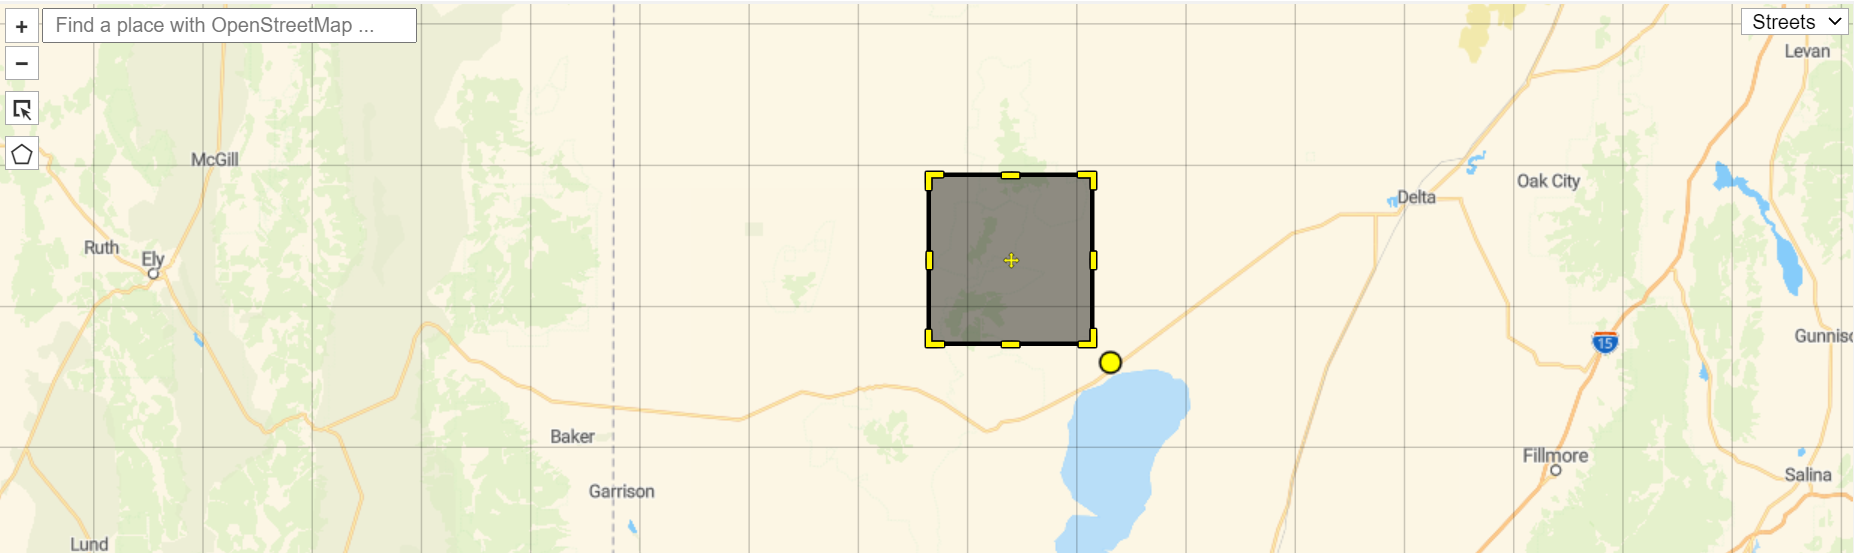

In [4]:
# get data every minute for a day, Sep 27 00:00 to 23:59 inclusive (in PDT, which is UTC-07:00)
time_start = int(datetime.datetime(2021, 9, 27, 0, 0, 0).timestamp())  # in PDT, can confirm with datetime.dateime.now()
time_res = 30  # seconds
seconds_per_week = 3600 * 24 * 7
#seconds_per_hour = 3600
times = [time_start + i * time_res for i in range(seconds_per_week // time_res)]

In [51]:
#flights = []
for i, t in enumerate(tqdm.tqdm(times[len(flights):])):
    d = get_count(t, lat_max, lat_min, lon_min, lon_max)
    flights.append(d)

100%|██████████████████████████████████████████████████████████████████████████████| 4061/4061 [34:07<00:00,  1.98it/s]


In [52]:
len(flights) - len(times)

0

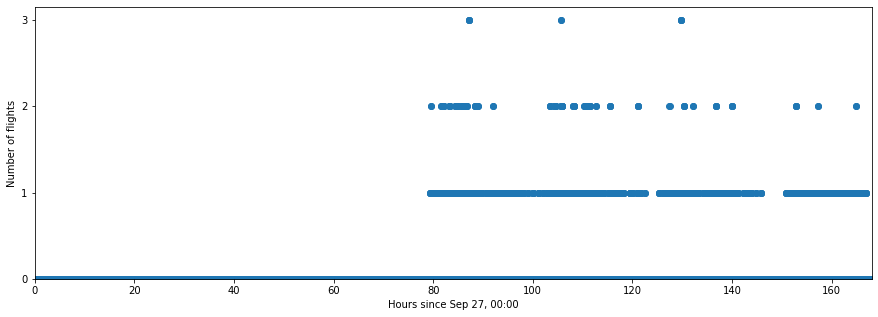

In [53]:
plt.figure(figsize=(15,5))
plt.scatter([(t-times[0])/3600 for t in times], [len(x) for x in flights])
plt.xlabel('Hours since Sep 27, 00:00')
plt.ylabel('Number of flights')
plt.ylim(0)
plt.xlim(0, 168)
plt.yticks([0, 1, 2, 3])
plt.show()

In [91]:
flight_indices

[9524,
 9525,
 9526,
 9527,
 9538,
 9539,
 9540,
 9541,
 9552,
 9553,
 9554,
 9555,
 9556,
 9557,
 9572,
 9573,
 9574,
 9575,
 9580,
 9581,
 9612,
 9613,
 9614,
 9615,
 9616,
 9617,
 9618,
 9619,
 9630,
 9631,
 9632,
 9633,
 9640,
 9641,
 9642,
 9643,
 9644,
 9645,
 9646,
 9647,
 9658,
 9659,
 9660,
 9661,
 9682,
 9683,
 9684,
 9685,
 9686,
 9687,
 9744,
 9745,
 9746,
 9747,
 9750,
 9751,
 9752,
 9753,
 9754,
 9755,
 9760,
 9761,
 9766,
 9767,
 9768,
 9769,
 9770,
 9771,
 9778,
 9779,
 9780,
 9781,
 9790,
 9791,
 9792,
 9793,
 9794,
 9795,
 9834,
 9835,
 9868,
 9869,
 9870,
 9871,
 9876,
 9877,
 9878,
 9879,
 9890,
 9891,
 9944,
 9945,
 9960,
 9961,
 9970,
 9971,
 9972,
 9973,
 9974,
 9975,
 9976,
 9977,
 9980,
 9981,
 9982,
 9983,
 10006,
 10007,
 10008,
 10009,
 10036,
 10037,
 10038,
 10039,
 10040,
 10041,
 10052,
 10053,
 10054,
 10055,
 10062,
 10063,
 10064,
 10065,
 10068,
 10069,
 10070,
 10071,
 10072,
 10073,
 10074,
 10075,
 10076,
 10077,
 10084,
 10085,
 10086,
 10087,
 1

In [60]:
flight_indices = [i for i, x in enumerate(flights) if len(x)>0]

In [63]:
len(flight_indices)/len(flights) * 100  # % time with a flight

7.529761904761904

In [64]:
flight_indices[:10]

[9524, 9525, 9526, 9527, 9538, 9539, 9540, 9541, 9552, 9553]

In [80]:
flights[flight_indices[1]][0][::-1]

[-113.3412, 39.2876]

In [84]:
flights[9526:9528]

[[[39.31, -113.19]], [[39.31, -113.19]]]

In [88]:
len(flight_indices)

1518

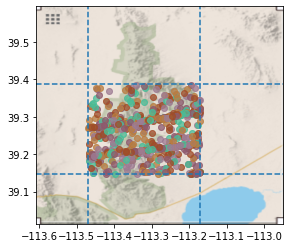

In [90]:
map_fig = plt.imread('bbox_planes2.png')
map_box = [-113.6078, -112.9486, 39.0142, 39.5944]
plt.figure()
plt.imshow(map_fig, extent=map_box)
for i in range(len(flight_indices)):
    plt.scatter(*flights[flight_indices[i]][0][::-1], alpha=0.5)
plt.axhline(lat_min, ls='--')
plt.axhline(lat_max, ls='--')
plt.axvline(lon_min, ls='--')
plt.axvline(lon_max, ls='--')
plt.show()

In [54]:
np.save('flights.npy', flights)

In [55]:
np.save('times.npy', times)